In [33]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [34]:

file1 = "/workspaces/EWT/EWT2/data/1 mM Lactat_1_20 Verdünnung_1. Messung.csv"
file2 = "/workspaces/EWT/EWT2/data/1 mM Lactat_1_20 Verdünnung_2. Messung.csv"
file3 ="/workspaces/EWT/EWT2/data/1 mM Lactat_1_20 Verdünnung_3. Messung.csv"
df1 = pd.read_csv(file1, sep=';', decimal=',', skiprows=36, encoding='latin1')
df2 = pd.read_csv(file2, sep=';', decimal=',', skiprows=36, encoding='latin1')
df3 = pd.read_csv(file3, sep=';', decimal=',', skiprows=36, encoding='latin1')
# Ersetze "OVER" durch NaN in der gesamten DataFrame
df1 = df1.replace('OVER', np.nan)

df1.head()

,Startzeit:,11.11.2025 15:59:51,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Zyklus Nr.,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
3,Zeit [s],0,8,16,24,32,40,48,56,64,...,408,416,424,432,440,448,456,464,472,480
4,Temp. [øC],--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


In [35]:
Kontrolle = pd.DataFrame()
MCT1 = pd.DataFrame()
PfFNT = pd.DataFrame()

In [36]:
def dataframe2(df1, df2, df3, x,y):
    """
    Erstellt einen DataFrame mit Mittelwerten und Standardabweichungen
    aus einem CSV-DataFrame und vier Zeilenindizes.
    
    Parameter:
    - df1: Eingabe-DataFrame (aus CSV)
    - x, y, z, w: Zeilenindizes für Zeit und die drei Messungen
    
    Rückgabe:
    - DataFrame mit Spalten: Time, 1.Messung, 2.Messung, 3.Messung, 
      Mittelwerte, Standardabweichung
    """
    Kontrolle = pd.DataFrame()
    Kontrolle["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    
    Kontrolle["1.Messung"] = df_d0(to_float_array(np.array(df1.iloc[y])[1:]))
    Kontrolle["2.Messung"] = df_d0(to_float_array(np.array(df2.iloc[y])[1:]))
    Kontrolle["3.Messung"] = df_d0(to_float_array(np.array(df3.iloc[y])[1:]))
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte = Kontrolle[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    Kontrolle["Mittelwerte"] = mittelwerte
    
    # Berechne Standardabweichung
    standardabweichung = Kontrolle[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    Kontrolle["Standardabweichung"] = standardabweichung
    
    return Kontrolle

In [37]:
Kontrolle = dataframe2(df1,df2,df3, 3, 5)

MCT1 = dataframe2(df1,df2,df3, 3, 6)
PfFNT = dataframe2(df1,df2,df3, 3, 7)

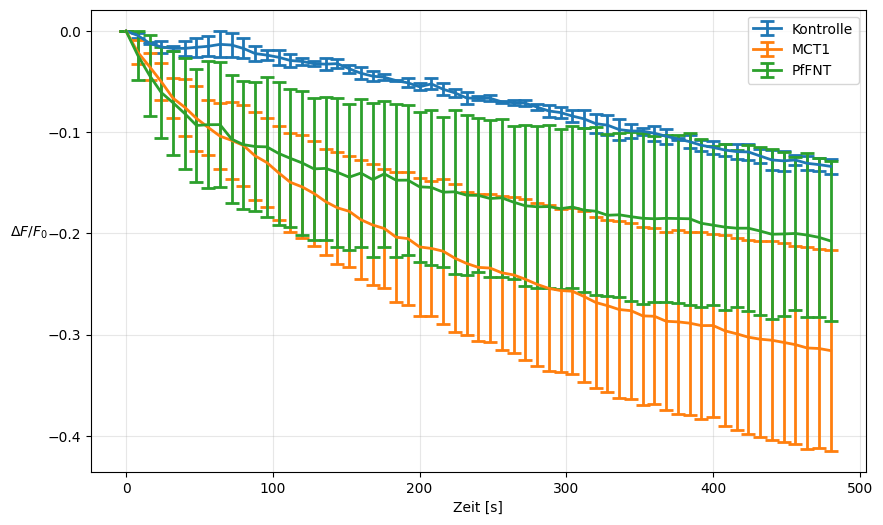

Abbildung gespeichert: ../figueres/MCT1_PfFNT_Efflux_1_20_Verdünnung.png


In [38]:
import os
outdir = os.path.join('..', 'figueres')
os.makedirs(outdir, exist_ok=True)
filename = os.path.join(outdir, 'MCT1_PfFNT_Efflux_1_20_Verdünnung.png')

plt.figure(figsize=(10, 6))


# Kontrolle 
plt.errorbar(Kontrolle["Time"], Kontrolle["Mittelwerte"], 
             yerr=Kontrolle["Standardabweichung"],
             label="Kontrolle", linewidth=2, capsize=5, capthick=2)

# Kontrolle MCT1
plt.errorbar(MCT1["Time"], MCT1["Mittelwerte"],
             yerr=MCT1["Standardabweichung"],
             label="MCT1", linewidth=2, capsize=5, capthick=2)

# PfFNT
plt.errorbar(PfFNT["Time"], PfFNT["Mittelwerte"],
             yerr=PfFNT["Standardabweichung"],
             label="PfFNT", linewidth=2, capsize=5, capthick=2)

plt.xlabel("Zeit [s]")
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=18)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.08, 0.5)
plt.legend()
plt.grid(True, alpha=0.3)

# Speichere die Abbildung als PNG
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()
print(f"Abbildung gespeichert: {filename}")


MCT1 Optimization:
  Total points: 61, Valid: 61
  Time range: [0.00, 480.00]
  Y range: [-0.31574, 0]
  Model: y = A*exp(-k*t) + C
  Initial: A=0.3147, k=0.0083163, C=-0.3147
  ✓ Fit successful!
    A = 0.32295 ± 0.040736
    k = 0.0050745 ± 0.0014072
    C = -0.33281 ± 0.043836
    Chi² = 0.82463

PfFNT Optimization:
  Total points: 61, Valid: 61
  Time range: [0.00, 480.00]
  Y range: [-0.20742, 0]
  Model: y = A*exp(-k*t) + C
  Initial: A=0.20563, k=0.014584, C=-0.20563
  ✓ Fit successful!
    A = 0.18313 ± 0.020838
    k = 0.010025 ± 0.0035865
    C = -0.18905 ± 0.018916
    Chi² = 1.3072


Optimized fit figure saved: ../figueres/MCT1_PfFNT_fit.png


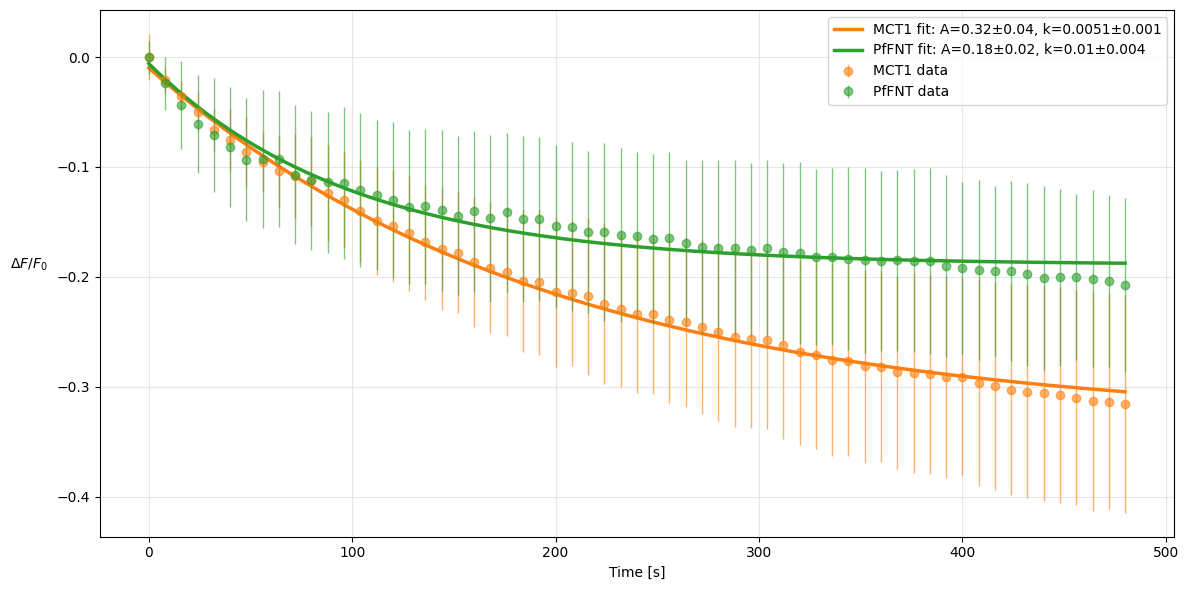


FINAL FIT RESULTS
Fit summary saved: ../figueres/MCT1_PfFNT_fit_summary.png
Fit summary saved: ../figueres/MCT1_PfFNT_fit_summary.png


In [39]:
# Exponential decay fits for MCT1 and PfFNT (optimized)
# Model: y(t) = A * exp(-k * t) + C
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import os

def exp_decay(t, A, k, C):
    return A * np.exp(-k * t) + C

def exp_decay_no_offset(t, A, k):
    """Simpler model without offset"""
    return A * np.exp(-k * t)

def fit_and_plot_optimized(df, label, color='C0', use_offset=True):
    """Optimized fitting with better initial guesses and bounds"""
    # Prepare data
    t_raw = pd.to_numeric(df['Time'], errors='coerce')
    y_raw = pd.to_numeric(df['Mittelwerte'], errors='coerce')
    yerr_raw = pd.to_numeric(df.get('Standardabweichung', pd.Series(np.zeros(len(df)))), errors='coerce')

    mask = (~t_raw.isna()) & (~y_raw.isna())
    t = t_raw[mask].values
    y = y_raw[mask].values
    yerr = yerr_raw[mask].values if len(yerr_raw) > 0 else np.ones_like(y)
    
    # Normalize errors (avoid division by zero)
    yerr[yerr == 0] = np.mean(np.abs(y)) * 0.1 if np.mean(np.abs(y)) > 0 else 1.0

    print(f"\n{label} Optimization:")
    print(f"  Total points: {len(df)}, Valid: {len(t)}")
    if len(t) > 0:
        print(f"  Time range: [{np.min(t):.2f}, {np.max(t):.2f}]")
        print(f"  Y range: [{np.min(y):.5g}, {np.max(y):.5g}]")

    if len(t) < 4:
        print(f"  ❌ Not enough points (need >=4)")
        return None

    # Better initial guess for k using slope at beginning
    if use_offset:
        # Estimate C as final value (asymptote)
        C0 = np.mean(y[-2:]) if len(y) > 1 else np.min(y)
        A0 = y[0] - C0
        
        # Estimate k from initial slope: dy/dt ≈ -A*k at t≈0
        if len(t) > 1 and A0 != 0:
            slope = (y[1] - y[0]) / (t[1] - t[0] + 1e-10)
            k0 = max(abs(slope / A0), 0.001)
        else:
            k0 = 0.01
        
        p0 = [A0, k0, C0]
        
        # Bounds: k should be positive, A can be positive or negative
        bounds = ([-np.inf, 0.0, -np.inf], [np.inf, 10.0, np.inf])
        
        print(f"  Model: y = A*exp(-k*t) + C")
        print(f"  Initial: A={A0:.5g}, k={k0:.5g}, C={C0:.5g}")
        
        try:
            popt, pcov = curve_fit(exp_decay, t, y, p0=p0, bounds=bounds, 
                                   sigma=yerr, absolute_sigma=True, maxfev=5000)
            A, k, C = popt
            perr = np.sqrt(np.diag(pcov))
        except Exception as e:
            print(f"  ⚠ Full model fit failed: {e}")
            print(f"    Trying simpler model without offset...")
            use_offset = False
    
    # Fallback: simpler model without offset
    if not use_offset or len(t) < 4:
        A0 = y[0]
        if len(t) > 1:
            slope = (y[1] - y[0]) / (t[1] - t[0] + 1e-10)
            k0 = max(abs(slope / A0), 0.001) if A0 != 0 else 0.01
        else:
            k0 = 0.01
        
        p0 = [A0, k0]
        bounds = ([-np.inf, 0.0], [np.inf, 10.0])
        
        print(f"  Model: y = A*exp(-k*t)")
        print(f"  Initial: A={A0:.5g}, k={k0:.5g}")
        
        try:
            popt, pcov = curve_fit(exp_decay_no_offset, t, y, p0=p0, bounds=bounds,
                                   sigma=yerr, absolute_sigma=True, maxfev=5000)
            A, k = popt
            C = 0.0
            perr = np.sqrt(np.diag(pcov))
            perr = np.append(perr, 0.0)  # Add zero error for C
        except Exception as e:
            print(f"  ❌ Fit failed: {e}")
            return None
    
    # Calculate residuals
    y_fit = exp_decay(t, A, k, C)
    residuals = y - y_fit
    chi2 = np.sum((residuals / yerr) ** 2)
    
    print(f"  ✓ Fit successful!")
    print(f"    A = {A:.5g} ± {perr[0]:.5g}")
    print(f"    k = {k:.5g} ± {perr[1]:.5g}")
    if use_offset:
        print(f"    C = {C:.5g} ± {perr[2]:.5g}")
    print(f"    Chi² = {chi2:.5g}")

    # Plot data with errorbars
    plt.errorbar(t, y, yerr=yerr, fmt='o', label=f'{label} data', 
                 color=color, alpha=0.6, markersize=6, elinewidth=1)

    # Plot fit curve
    t_fine = np.linspace(np.min(t), np.max(t), 300)
    y_fit_fine = exp_decay(t_fine, A, k, C)
    plt.plot(t_fine, y_fit_fine, '-', color=color, linewidth=2.5, 
             label=f'{label} fit: A={A:.2g}±{perr[0]:.1g}, k={k:.2g}±{perr[1]:.1g}')

    return {'label': label, 'popt': (A, k, C), 'perr': perr, 'chi2': chi2, 'residuals': residuals, 't': t}

# Make combined fit plot
plt.figure(figsize=(12, 6))
res_mct1 = fit_and_plot_optimized(MCT1, 'MCT1', color='tab:orange')
res_pffnt = fit_and_plot_optimized(PfFNT, 'PfFNT', color='tab:green')

plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save optimized fit figure
outdir = os.path.join('..', 'figueres')
os.makedirs(outdir, exist_ok=True)
fit_filename = os.path.join(outdir, 'MCT1_PfFNT_fit.png')
plt.savefig(fit_filename, dpi=300, bbox_inches='tight')
print(f"Optimized fit figure saved: {fit_filename}")

plt.show()

# Print final summary
print("\n" + "="*60)
print("FINAL FIT RESULTS")
print("="*60)
summary_lines = []
for r in (res_mct1, res_pffnt):
    if r is not None:
        A, k, C = r['popt']
        eA, ek, eC = r['perr']
        tau = 1.0/k if k != 0 else np.inf
        summary_lines.append(f"{r['label']}:")
        summary_lines.append(f"  Exponential: y(t) = {A:.4g}*exp({-k:.4g}*t) + {C:.4g}")
        summary_lines.append(f"  A = {A:.5g} ± {eA:.5g}")
        summary_lines.append(f"  k = {k:.5g} ± {ek:.5g} [1/min]")
        summary_lines.append(f"  τ (lifetime) = {tau:.4g} min")
        summary_lines.append(f"  C (offset) = {C:.5g} ± {eC:.5g}")
        summary_lines.append(f"  χ² = {r['chi2']:.4g}")
        summary_lines.append("")
    else:
        summary_lines.append(f"{r['label']} fit: FAILED")
        summary_lines.append("")

# Save summary text as PNG
summary_text = "\n".join(summary_lines)
fig_txt = plt.figure(figsize=(8, max(2, 0.2*len(summary_lines))))
fig_txt.text(0.01, 0.99, summary_text, va='top', family='monospace', fontsize=10)
summary_filename = os.path.join(outdir, 'MCT1_PfFNT_fit_summary.png')
fig_txt.savefig(summary_filename, dpi=300, bbox_inches='tight')
plt.close(fig_txt)
print(f"Fit summary saved: {summary_filename}")

print("="*60)
